In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [2]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 6ms/step - loss: 0.5289 - accuracy: 0.8135 - val_loss: 0.4398 - val_accuracy: 0.8420
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4000 - accuracy: 0.8547 - val_loss: 0.3993 - val_accuracy: 0.8562
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3652 - accuracy: 0.8667 - val_loss: 0.3782 - val_accuracy: 0.8639
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3447 - accuracy: 0.8737 - val_loss: 0.3552 - val_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3290 - accuracy: 0.8785 - val_loss: 0.3496 - val_accuracy: 0.8749
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3181 - accuracy: 0.8811 - val_loss: 0.3428 - val_accuracy: 0.8759
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3072 - accuracy: 0.8860 - val_loss: 0.3442 - val_accuracy

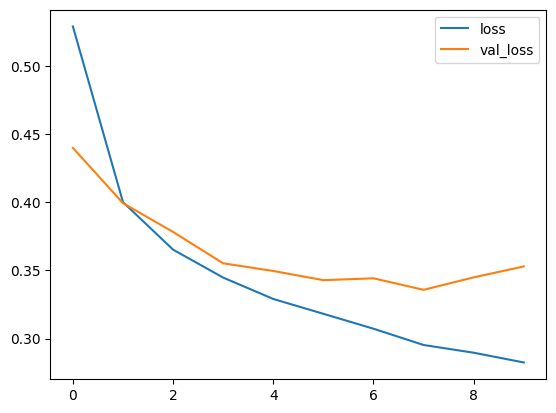

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

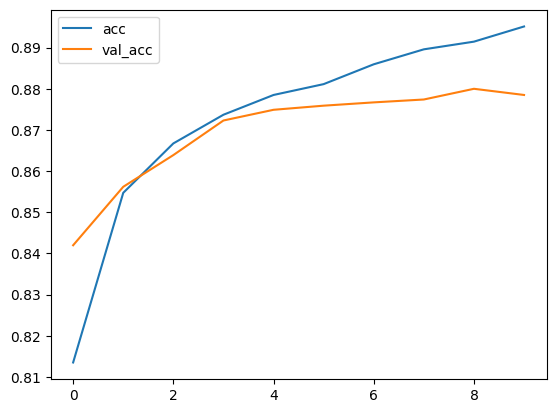

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8785
[0.3528863489627838, 0.8784999847412109]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[879   1   4  27   2   1  81   0   5   0]
 [  3 967   0  24   2   0   2   0   2   0]
 [ 21   1 715  24 113   0 124   0   2   0]
 [ 26   2   2 937   8   0  19   0   6   0]
 [  1   1  60  69 745   0 117   0   7   0]
 [  0   0   0   1   0 957   0  29   2  11]
 [161   1  49  40  41   0 692   0  16   0]
 [  0   0   0   0   0   9   0 955   1  35]
 [  3   0   0   5   2   1   7   6 976   0]
 [  0   0   0   0   0   8   1  29   0 962]]


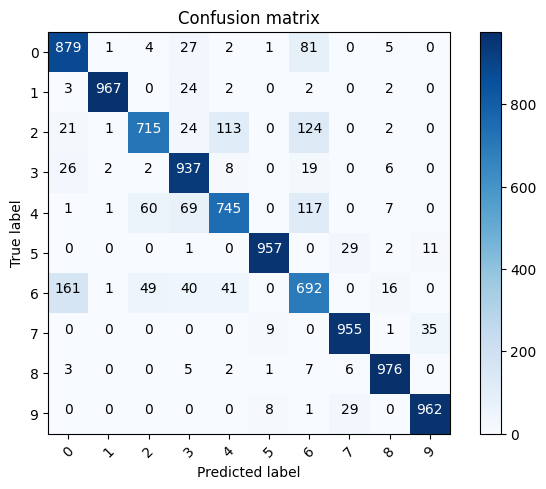

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


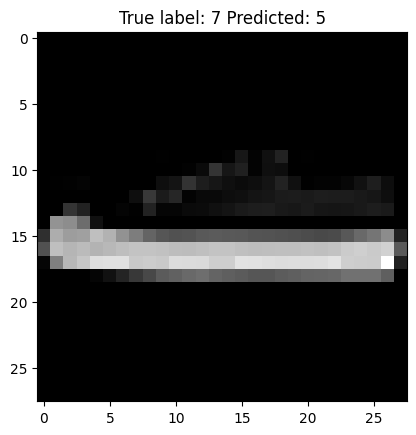

In [10]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));